<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h1> Regression Model </h1>


<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [55]:
df = pd.read_csv("../data/states_edu.csv")
print(df.shape)
df.head()

(1715, 25)


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

## Data Cleaning Overview: 
- The columns are renamed to be consistent with 'Tutorial 2'
- The dataframe was initially cleaned to include only the rows that contained values for the average 4th grade reading score. 
- The remaining null values are filled in the 'Feature Selection' section

In [58]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [59]:
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
print(f'Shape: {df.shape}')
#print(df.isna().sum())

Shape: (650, 25)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Reading for 4th Grade>** 


Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [60]:
df['YEAR'].nunique()
df['YEAR'].unique()

array([1992, 1994, 1998, 2002, 2003, 2005, 2007, 2009, 2011, 2013, 2015,
       2017, 2000, 2019])

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [61]:
df.groupby('STATE').AVG_READING_4_SCORE.mean()[['MICHIGAN','OHIO']].idxmax()

'OHIO'

Find the average for your outcome score across all states in 2019

In [62]:
df[df['YEAR']==2019]['AVG_READING_4_SCORE'].mean()

219.79245283018867

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [63]:
df.groupby('STATE').AVG_READING_4_SCORE.max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [64]:
df['HS_COMP_RATE'] = df['ENROLL_12']/df['ENROLL_8']
df['LOCAL_REVENUE_PER_STUDENT'] = df['LOCAL_REVENUE']/df['ENROLL_PRIMARY']
df['EDU_EXPENDITURE'] = df['SUPPORT_SERVICES_EXPENDITURE']+df['INSTRUCTION_EXPENDITURE']
df['SPEND_PER_STUDENT'] = df['EDU_EXPENDITURE']/df['ENROLL_ALL']
df['PERCENT_EDU'] = df['EDU_EXPENDITURE']/df['TOTAL_EXPENDITURE']

In [65]:
#Exclude any data collected before the year 2000
df = df[df['YEAR']>2000]

In [66]:
select_columns = ['AVG_MATH_4_SCORE','AVG_READING_4_SCORE','YEAR',
                 'AVG_MATH_8_SCORE','AVG_READING_8_SCORE','HS_COMP_RATE',
             'SPEND_PER_STUDENT','LOCAL_REVENUE_PER_STUDENT', 'PERCENT_EDU']

sub_df = df[select_columns]

In [67]:
def standardize_data(df):
    new_cols = ['YEAR']
    for col in df.columns:
        if(col != 'YEAR'):
            new_col = str(col+'_ZS')
            df[new_col] = (df[col]-df[col].mean())/(df[col].std())
            new_cols.append(new_col)
    return(df[new_cols])

def fill_average(df):
    for col in df.columns:
        df[col].fillna(df[col].mean(),inplace=True)
    return(df)

In [68]:
select_data = fill_average(sub_df)
select_data = standardize_data(sub_df)

not_stand = fill_average(sub_df)
not_stand = not_stand[select_columns]

/Users/tfouts/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-67-44170c1af922>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = (df[col]-df[col].mean())/(df[col].std())


In [69]:
select_data.isna().sum()

YEAR                            0
AVG_MATH_4_SCORE_ZS             0
AVG_READING_4_SCORE_ZS          0
AVG_MATH_8_SCORE_ZS             0
AVG_READING_8_SCORE_ZS          0
HS_COMP_RATE_ZS                 0
SPEND_PER_STUDENT_ZS            0
LOCAL_REVENUE_PER_STUDENT_ZS    0
PERCENT_EDU_ZS                  0
dtype: int64

In [70]:
select_data.shape

(523, 9)

Final feature list: **<'YEAR', 'AVG_MATH_4_SCORE','AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE', 'HS_COMP_RATE','SPEND_PER_STUDENT 'LOCAL_REVENUE_PER_STUDENT','PERCENT_EDU'>**

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**
- All of the following features were used to train a model both in their raw form and in a 'standardized' form. To standardize the data, each value was calculated as a Z-score relative to the rest of the values in their respective column using the equation Z = (x-u)/s, where u is the column average and s is the column standard deviation.
- To avoid dropping too many rows from the dataset, after performing the initial data cleaning, all remaining null values were filled with the average value of the column. Filling the null values in this manner should not affect the data's distribution nor influence the model dramatically, but it will give us more data to train on. 

- These features were selected to represent the emphasis on continued education in a region. The catagories 'SPEND_PER_STUDENT' and 'LOCAL_REVENUE_PER_STUDENT' were seperated because my research indicated that the local governments are responsible for funding primary schools, whereas the SPEND_PER_STUDENT reflects how much money the region dedicated to all students. Additionally, the 'PERCENT_EDU' represents what percentage of the regions total expenditures are on education, and therefore reflects their financial emphasis on education. 

- The average math scores for 4th and 8th grade and average reading score for 8th grade were included because districts that perform strongly in math in 4th grade likely perform strongly in reading in 4th grade, and a strong performance in these subjects in 8th grade would likely correlate to a strong performace in 4th grade. 

- The 'HS_COMP_RATE' was calculated as a ratio of the number of students in 12th grade to the number of students in 8th grade. While this ratio may not accurately reflect the true high school graduation rate, it does indicate how the percentage of students in 8th grade in a region that graduate from high school in the same region. It does not account for students who move into or out of the specified region, but it represents the concentration of students in the lower and higher levels of education. 

- Only data collected after the year 2000 was included in dataset. Prior to the year 2000, the dataset included data from three years (1992, 1994, 1998). These years are spread out enough that including them in the dataset would confuse the model and introduce additional noise. 

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

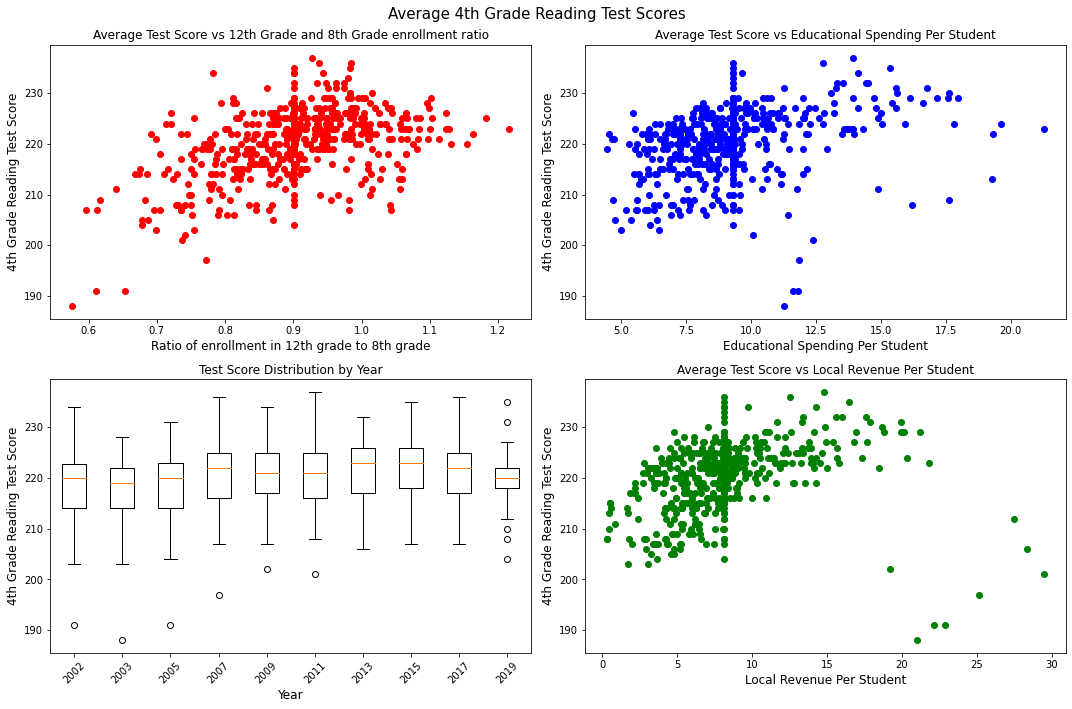

In [74]:
fig = plt.figure(figsize=(15,10))

test_score = not_stand['AVG_READING_4_SCORE']

ax1 = fig.add_subplot(2,2,1)
ax1.plot(not_stand['HS_COMP_RATE'],test_score,'o',color='red')
ax1.set_xlabel('Ratio of enrollment in 12th grade to 8th grade',fontsize=12)
ax1.set_ylabel('4th Grade Reading Test Score',fontsize = 12)
ax1.set_title('Average Test Score vs 12th Grade and 8th Grade enrollment ratio');

ax2 = fig.add_subplot(2,2,2)
ax2.plot(not_stand['SPEND_PER_STUDENT'],test_score,'o',color='b')
ax2.set_xlabel('Educational Spending Per Student',fontsize=12)
ax2.set_ylabel('4th Grade Reading Test Score',fontsize = 12)
ax2.set_title('Average Test Score vs Educational Spending Per Student');

scores_by_year = []
years = not_stand['YEAR'].unique()
for year in years:
    scores_by_year.append((not_stand[not_stand['YEAR']==int(year)])['AVG_READING_4_SCORE'])
tick_location = np.arange(0,len(scores_by_year),1)
ax3 = fig.add_subplot(2,2,3)

ax3.boxplot(scores_by_year)
ax3.set_xlabel('Year',fontsize=12)
ax3.set_ylabel('4th Grade Reading Test Score',fontsize = 12)
ax3.set_xticklabels(years, rotation = 45)
ax3.set_title('Test Score Distribution by Year');

ax4 = fig.add_subplot(2,2,4)
ax4.plot(not_stand['LOCAL_REVENUE_PER_STUDENT'],test_score,'o',color='g')
ax4.set_xlabel('Local Revenue Per Student',fontsize=12)
ax4.set_ylabel('4th Grade Reading Test Score',fontsize = 12)
ax4.set_title('Average Test Score vs Local Revenue Per Student');


fig.suptitle('Average 4th Grade Reading Test Scores', fontsize = 15);
fig.tight_layout()

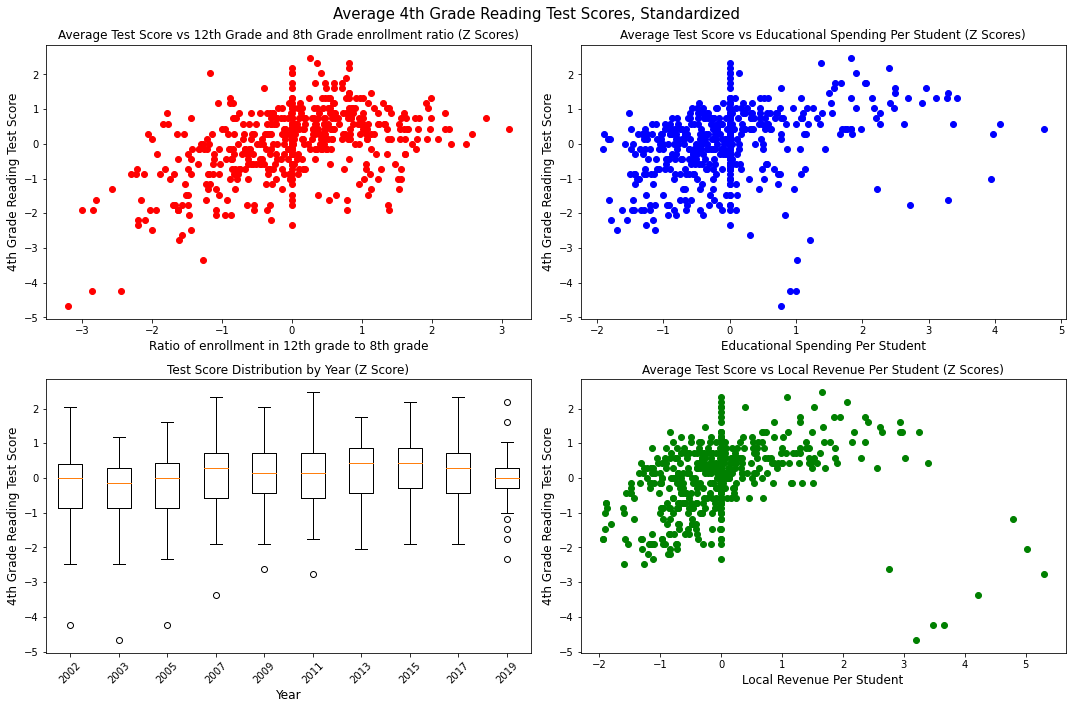

In [75]:
fig = plt.figure(figsize=(15,10))

test_score = select_data['AVG_READING_4_SCORE_ZS']

ax1 = fig.add_subplot(2,2,1)
ax1.plot(select_data['HS_COMP_RATE_ZS'],test_score,'o',color='red')
ax1.set_xlabel('Ratio of enrollment in 12th grade to 8th grade',fontsize=12)
ax1.set_ylabel('4th Grade Reading Test Score',fontsize = 12)
ax1.set_title('Average Test Score vs 12th Grade and 8th Grade enrollment ratio (Z Scores)');

ax2 = fig.add_subplot(2,2,2)
ax2.plot(select_data['SPEND_PER_STUDENT_ZS'],test_score,'o',color='b')
ax2.set_xlabel('Educational Spending Per Student',fontsize=12)
ax2.set_ylabel('4th Grade Reading Test Score',fontsize = 12)
ax2.set_title('Average Test Score vs Educational Spending Per Student (Z Scores)');

scores_by_year = []
years = select_data['YEAR'].unique()
for year in years:
    scores_by_year.append((select_data[select_data['YEAR']==int(year)])['AVG_READING_4_SCORE_ZS'])
tick_location = np.arange(0,len(scores_by_year),1)
ax3 = fig.add_subplot(2,2,3)

ax3.boxplot(scores_by_year)
ax3.set_xlabel('Year',fontsize=12)
ax3.set_ylabel('4th Grade Reading Test Score',fontsize = 12)
ax3.set_xticklabels(years, rotation = 45)
ax3.set_title('Test Score Distribution by Year (Z Score)');

ax4 = fig.add_subplot(2,2,4)
ax4.plot(select_data['LOCAL_REVENUE_PER_STUDENT_ZS'],test_score,'o',color='g')
ax4.set_xlabel('Local Revenue Per Student',fontsize=12)
ax4.set_ylabel('4th Grade Reading Test Score',fontsize = 12)
ax4.set_title('Average Test Score vs Local Revenue Per Student (Z Scores)');


fig.suptitle('Average 4th Grade Reading Test Scores, Standardized', fontsize = 15);
fig.tight_layout()

**The Average 4th Grade Reading Score was graphed against the ratio of enrollment in 12th grade to 8th grade, the educational spending per student, the year of the tests, and the local revenue per student. This data was graphed in its raw form and in its standardized form. The shape of both sets of graphs is constant, but the scale of the axis is significantly reduced.**

**Visualization 2**

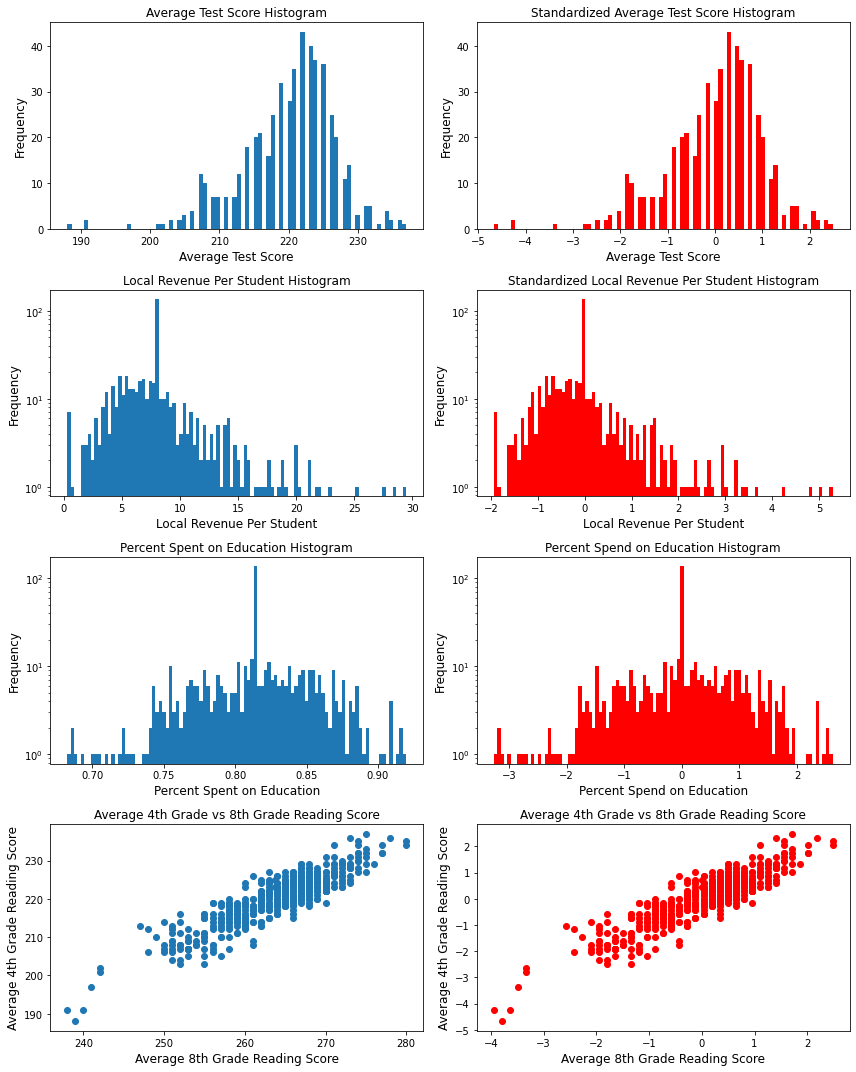

In [76]:
fig = plt.figure(figsize=(12,15))


ax1 = fig.add_subplot(4,2,1)
ax1.hist(not_stand['AVG_READING_4_SCORE'], bins = 80)
ax1.set_xlabel('Average Test Score',fontsize=12)
ax1.set_ylabel('Frequency',fontsize = 12)
ax1.set_title('Average Test Score Histogram');

ax2 = fig.add_subplot(4,2,2)
ax2.hist(select_data['AVG_READING_4_SCORE_ZS'], bins = 80, color = 'red')
ax2.set_xlabel('Average Test Score',fontsize=12)
ax2.set_ylabel('Frequency',fontsize = 12)
ax2.set_title('Standardized Average Test Score Histogram');

ax3 = fig.add_subplot(4,2,3)
ax3.hist(not_stand['LOCAL_REVENUE_PER_STUDENT'], bins = 100)
ax3.set_xlabel('Local Revenue Per Student',fontsize=12)
ax3.set_ylabel('Frequency',fontsize = 12)
ax3.set_yscale('log')
ax3.set_title('Local Revenue Per Student Histogram');

ax4 = fig.add_subplot(4,2,4)
ax4.hist(select_data['LOCAL_REVENUE_PER_STUDENT_ZS'], bins = 100, color = 'red')
ax4.set_xlabel('Local Revenue Per Student',fontsize=12)
ax4.set_ylabel('Frequency',fontsize = 12)
ax4.set_yscale('log')
ax4.set_title('Standardized Local Revenue Per Student Histogram');

ax5 = fig.add_subplot(4,2,5)
ax5.hist(not_stand['PERCENT_EDU'], bins = 100)
ax5.set_xlabel('Percent Spent on Education',fontsize=12)
ax5.set_ylabel('Frequency',fontsize = 12)
ax5.set_yscale('log')
ax5.set_title('Percent Spent on Education Histogram');

ax6 = fig.add_subplot(4,2,6)
ax6.hist(select_data['PERCENT_EDU_ZS'], bins = 100, color = 'red')
ax6.set_xlabel('Percent Spend on Education',fontsize=12)
ax6.set_ylabel('Frequency',fontsize = 12)
ax6.set_yscale('log')
ax6.set_title('Percent Spend on Education Histogram');

ax7 = fig.add_subplot(4,2,7)
ax7.plot(not_stand['AVG_READING_8_SCORE'], not_stand['AVG_READING_4_SCORE'], 'o')
ax7.set_xlabel('Average 8th Grade Reading Score',fontsize=12)
ax7.set_ylabel('Average 4th Grade Reading Score',fontsize = 12)
ax7.set_title('Average 4th Grade vs 8th Grade Reading Score');

ax8 = fig.add_subplot(4,2,8)
ax8.plot(select_data['AVG_READING_8_SCORE_ZS'], select_data['AVG_READING_4_SCORE_ZS'], 'o', color = 'red')
ax8.set_xlabel('Average 8th Grade Reading Score',fontsize=12)
ax8.set_ylabel('Average 4th Grade Reading Score',fontsize = 12)
ax8.set_title('Average 4th Grade vs 8th Grade Reading Score');


fig.tight_layout()

**The distribution of average 4th grade reading score, local revenue per student, and percent spent on education for the raw data and the standardized data were graphed to ensure that the distribution of the data was affected by the standardization process. The final row graphs the average 4th grade reading score vs the average 8th grade reading score for both the raw and standardized data to visualize the strong correlation between the two catagories and to prove that standardizing the data does not affect the data distribution.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [77]:
from sklearn.model_selection import train_test_split

In [79]:
X_stand = select_data[['YEAR', 'AVG_MATH_4_SCORE_ZS',
       'AVG_MATH_8_SCORE_ZS', 'AVG_READING_8_SCORE_ZS', 'HS_COMP_RATE_ZS',
       'SPEND_PER_STUDENT_ZS', 'LOCAL_REVENUE_PER_STUDENT_ZS',
       'PERCENT_EDU_ZS']]
y_stand = select_data['AVG_READING_4_SCORE_ZS']

In [80]:
X_raw = not_stand[['YEAR', 'AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE', 'HS_COMP_RATE',
       'SPEND_PER_STUDENT', 'LOCAL_REVENUE_PER_STUDENT',
       'PERCENT_EDU']]
y_raw = not_stand['AVG_READING_4_SCORE']

In [81]:
X_train_stand, X_test_stand, y_train_stand, y_test_stand = train_test_split(X_stand, y_stand, test_size=0.3, random_state=101)

In [82]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.3, random_state=101)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **Linear Regression**

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
# create your model here
model_stand = LinearRegression()
model_raw = LinearRegression()

In [103]:
model_stand.fit(X_train_stand, y_train_stand)
model_raw.fit(X_train_raw, y_train_raw)

LinearRegression()

In [104]:
y_pred_stand = model_stand.predict(X_test_stand)
y_pred_raw = model_raw.predict(X_test_raw)

In [105]:
print(model_stand.score(X_test_stand, y_test_stand))
print(model_raw.score(X_test_raw, y_test_raw))

0.8522870563259582
0.8522870563259587


### Comparison of the two models
- As we can see, the performance of the model trained on the standardized data is the same as the performance of the model trained on the raw data. This makes sense because the transformation we performed did not change the shape of the distribution of the data, so a linear model should perform equally well on both data sets.
- The first time I ran the model, the large range of values in the raw data posed issues while training the model, but after additional cleaning and feature selection, the model trained well on both the raw data and standardized data. Given that the two models performed equally, all subsequent tests will only be performed on the raw data. 

In [106]:
print(model_raw.intercept_)
print(model_raw.coef_)

-70.12970188363016
[ 0.00734151  0.7092408  -0.47163162  0.91112496 -1.36449759  0.16665084
  0.00989462 -2.92724549]


In [107]:
np.mean(model_raw.predict(X_test_raw)-y_test_raw)

-0.15954963689440735

In [108]:
np.mean(np.abs(model_raw.predict(X_test_raw)-y_test_raw))

1.8836717167792587

In [109]:
np.mean((model_raw.predict(X_test_raw)-y_test_raw)**2)**0.5

2.407468334450952

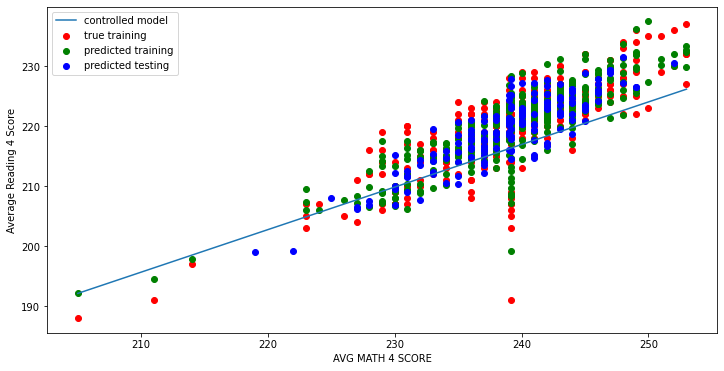

In [321]:
# quickly visualize results
col_name = 'AVG_MATH_4_SCORE'
col_index = X_train_raw.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train_raw[col_name], y_train_raw, color = "red")
plt.scatter(X_train_raw[col_name], model_raw.predict(X_train_raw), color = "green")
plt.scatter(X_test_raw[col_name], model_raw.predict(X_test_raw), color = "blue")

new_x = np.linspace(X_train_raw[col_name].min(),X_train_raw[col_name].max(),100)
intercept = model_raw.predict([X_train_raw.sort_values(col_name).iloc[0]]) - X_train_raw[col_name].min()*model_raw.coef_[col_index]
plt.plot(new_x, intercept+new_x*model_raw.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name.replace('_',' '))
plt.ylabel('Average Reading 4 Score');

<h2> Summary </h2>

- By selecting certain features and cleaning the data, we were able to predict the average reading test score for 4th graders with 85% accuracy. The first time I tried to train a model on the raw data, I encountered issues with the data being spread across too large of a scale. To solve this problem, I standardized the data by representing each value as a Z score relative to the other values in their respective column. However, when I ran the model again on the raw data, the model trained on the raw data and the model trained on the standardized data performed equally well. While standardizing the data did not improve the performace of the model, the consistency in accuracy of the models trained on the raw data and the standardized data proves that representing values as a Z score is a valid approach for reducing the range of data. The visualization shows that the standardized data has the same distribution as the raw data, so when training a linear regression model, standardizing the data in the manner will have no effect on the final accuracy. 
- If I am being completely honest, I spent a fair bit of time trying to figure out how to standardize and clean the data after my first model would not compile, and I was a little dissapointed when the model eventually trained on the raw data and performed the exact same as the standardized data. I decided to train another model to try to predict the geographical region of each data segment out of my own curiousity, and I included it below. I did not do a proper EDA, data visualization, or summary, but I was able to achieve a 71% classification accuracy using a KNN with K=1. I included it because I thought it was interesting, but I would prefer to be evaluated based on my first models. Thank you

<h1> Classification </h1>


<h2> Data Cleanup and Feature Selection</h2>

In [268]:
df = pd.read_csv("../data/states_edu.csv")
#df.notna().sum()

In [269]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [270]:
cols = ['STATE','YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','ENROLL_PREK', 'ENROLL_KINDER','ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

In [271]:
NORTH_EAST = ['CONNECTICUT','VERMONT','NEW_JERSEY','PENNSYLVANIA','RHODE_ISLAND','DELAWARE','MAINE','MARYLAND','MASSACHUSETTS','NEW_YORK','NEW_HAMPSHIRE']

MID_WEST = ['INDIANA','IOWA','SOUTH_DAKOTA','KANSAS','ILLINOIS','WISCONSIN','MICHIGAN','MINNESOTA','MISSOURI','NEBRASKA','OHIO','NORTH_DAKOTA']

SOUTH = ['ALABAMA','SOUTH_CAROLINA','VIRGINIA','WEST_VIRGINIA','TENNESSEE','NORTH_CAROLINA','ARKANSAS','FLORIDA','GEORGIA','KENTUCKY','LOUISIANA','MISSISSIPPI','NEW_MEXICO','ARIZONA','OKLAHOMA','TEXAS']

WEST = ['CALIFORNIA','COLORADO','IDAHO','UTAH','WYOMING','MONTANA','WASHINGTON','NEVADA','OREGON']


In [272]:
NE_df = df[df['STATE'].isin(NORTH_EAST)][cols[1:]].dropna()
MW_df = df[df['STATE'].isin(MID_WEST)][cols[1:]].dropna()
S_df = df[df['STATE'].isin(SOUTH)][cols[1:]].dropna()
W_df = df[df['STATE'].isin(WEST)][cols[1:]].dropna()

In [273]:
NE_df['REGION'] = 1
MW_df['REGION'] = 2
S_df['REGION'] = 3
W_df['REGION'] = 4

In [274]:
df_regs = pd.concat([NE_df,MW_df,S_df,W_df])

In [275]:
df_regs.shape

(334, 17)

### Explanation of feature selection and data cleaning
- The 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE','TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','ENROLL_PREK', 'ENROLL_KINDER','ENROLL_PRIMARY', 'ENROLL_HS','ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', and 'AVG_READING_8_SCORE' columns were selected for this classification task 
- The number of students enrolled at the various levels of education was included to ideally give some indication as to the population of each state.
- The revenues and expenditures at a federal, state, and local level were included to differentiate between the different states financially. 
- The average test scores for both reading and math for 4th graders and 8th graders were included to see if there is a correlation between how well students perform and the region of the country they live in. 
- The states were divided into their respective regions based on the map below. After being divided by their geographical regions, all rows with null values were dropped from the dataset, resulting in a dataframe with 334 rows. 

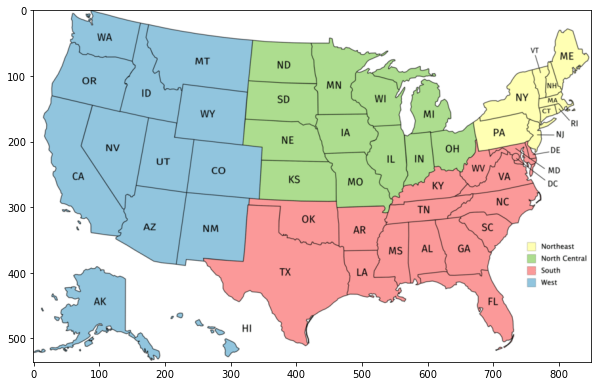

In [295]:
import matplotlib.image as mpimg
image = mpimg.imread("USRegions.png")
plt.figure(figsize = (10,10))
plt.imshow(image);

## Data creation and model training
- The data is divided such that the region is dependent variable and all other columns are independent variables
- A K-nearest neighbor model is trained with the data, and the number of neigbors was varied from 1-9 to find the most accurate model 

In [248]:
X_class = df_regs[df_regs.columns[:-1]]
y_class = df_regs['REGION']

In [249]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class,y_class, test_size = 0.3, random_state = 101)

In [250]:
from sklearn.neighbors import KNeighborsClassifier

In [312]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_9 = KNeighborsClassifier(n_neighbors=9)

In [314]:
knn_1.fit(X_train_class,y_train_class)
knn_3.fit(X_train_class,y_train_class)
knn_5.fit(X_train_class,y_train_class)
knn_7.fit(X_train_class,y_train_class)
knn_9.fit(X_train_class,y_train_class)

KNeighborsClassifier(n_neighbors=9)

In [315]:
y_pred_class_1 = knn_1.predict(X_test_class)
y_pred_class_3 = knn_3.predict(X_test_class)
y_pred_class_5 = knn_5.predict(X_test_class)
y_pred_class_7 = knn_7.predict(X_test_class)
y_pred_class_9 = knn_9.predict(X_test_class)

In [326]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [347]:
from sklearn import metrics
models = [knn_1, knn_3, knn_5, knn_7, knn_9]

for i, model in enumerate(models):
    print(f'K = {i*2+1}: Accuracy: {model.score(X_test_class, y_test_class)}')
print('')

for i, model in enumerate(models):
    print(f'K = {i*2+1}: The model performance for test set is:')
    y_pred_test = model.predict(X_test_class)
    print('MAE: ', metrics.mean_absolute_error(y_test_class, y_pred_test))
    print('MSE: ', metrics.mean_squared_error(y_test_class, y_pred_test))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_class, y_pred_test)))
    print('')

K = 1: Accuracy: 0.7128712871287128
K = 3: Accuracy: 0.6732673267326733
K = 5: Accuracy: 0.693069306930693
K = 7: Accuracy: 0.6237623762376238
K = 9: Accuracy: 0.6237623762376238

K = 1: The model performance for test set is:
MAE:  0.40594059405940597
MSE:  0.6633663366336634
RMSE:  0.8144730423001509

K = 3: The model performance for test set is:
MAE:  0.5346534653465347
MSE:  1.00990099009901
RMSE:  1.0049383016379712

K = 5: The model performance for test set is:
MAE:  0.48514851485148514
MSE:  0.8811881188118812
RMSE:  0.9387162078135656

K = 7: The model performance for test set is:
MAE:  0.6336633663366337
MSE:  1.2475247524752475
RMSE:  1.116926475859198

K = 9: The model performance for test set is:
MAE:  0.6633663366336634
MSE:  1.3564356435643565
RMSE:  1.1646611711413566



### Since the model achieved its highest accuracy with K = 1, this model will be used for subsequent evaluations

In [348]:
from sklearn.metrics import plot_confusion_matrix

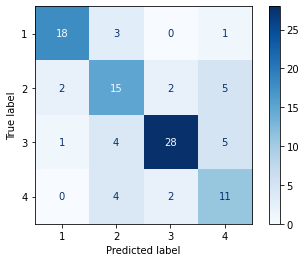

In [349]:
plot_confusion_matrix(knn_1, X_test_class, y_test_class,
                         cmap=plt.cm.Blues);

In [350]:
region_names = {1: 'North East',2:'Mid West',3:'South', 4:'West'}

pred_dict = {1:[], 2:[], 3:[], 4:[]}
actual_tests = {}

for i, correct_reg in enumerate(list(y_test_class)): 
    pred_dict[correct_reg].append(y_pred_class_1[i])

In [351]:
for correct_reg in list(pred_dict.keys()):
    total_preds = 0
    pred_region = {}
    print(f'Of the {list(y_test_class).count(correct_reg)} that were taken in the {region_names[correct_reg]}, the model predicted that:')
    for reg in pred_dict[correct_reg]:
        total_preds+=1
        if(reg in pred_region):
            pred_region[reg] +=1
        else:
            pred_region[reg] = 1
    for reg in list(pred_region.keys()):
        print(f'{pred_region[reg]} of the tests were taken in {region_names[reg]}')
    print(f'The model correctly identified tests in the {region_names[correct_reg]} {round((pred_region[correct_reg]/total_preds)*100,2)}% of the time')
    print('')

Of the 22 that were taken in the North East, the model predicted that:
3 of the tests were taken in Mid West
18 of the tests were taken in North East
1 of the tests were taken in West
The model correctly identified tests in the North East 81.82% of the time

Of the 24 that were taken in the Mid West, the model predicted that:
15 of the tests were taken in Mid West
2 of the tests were taken in North East
2 of the tests were taken in South
5 of the tests were taken in West
The model correctly identified tests in the Mid West 62.5% of the time

Of the 38 that were taken in the South, the model predicted that:
4 of the tests were taken in Mid West
28 of the tests were taken in South
1 of the tests were taken in North East
5 of the tests were taken in West
The model correctly identified tests in the South 73.68% of the time

Of the 17 that were taken in the West, the model predicted that:
11 of the tests were taken in West
4 of the tests were taken in Mid West
2 of the tests were taken in S